In [18]:
import numpy as np
import matplotlib.pyplot as p
import audio_lib as audio

In [19]:
def add_noise(clean, noise, snr=10):
        # from DCCRN, test snr [0, 20], train snr [-5, 20] dB
    while len(noise) <= len(clean):
        noise = np.concatenate([noise, noise])
    if len(noise) > len(clean):
        rd_idx = np.random.randint(0, len(noise) - len(clean))
        noise = noise[rd_idx:rd_idx+len(clean)]

    A_clean = np.mean(np.abs(clean))
    A_noise = np.mean(np.abs(noise))
        
    noise = noise * A_clean / (A_noise*10**(snr/20)+0.00001)

    mixed = clean + noise
    return mixed
def mean_abs_error(clean_wav_, estimated_wav_):
    loss = clean_wav_ - estimated_wav_
    loss = np.mean(np.abs(loss))
    return loss
def SI_SNR(clean_wav_, estimated_wav_):
    s_target = np.reshape(np.sum(clean_wav_*estimated_wav_, axis=-1), [-1,1])*clean_wav_/np.reshape(np.sum(np.square(clean_wav_),axis=-1), [-1,1])
    e_noise = estimated_wav_-clean_wav_
    loss_ = np.sum(np.square(s_target),axis=-1)/np.sum(np.square(e_noise),axis=-1)
    loss_ = 10.*np.log(loss_)/np.log(10.)
    loss_ = -1. * np.mean(loss_, axis=0) # the bigger SNR is, the better res is, so to minimize -1 * loss
    return loss_

In [38]:
np.random.randint(0, 4)

3

In [36]:
path1 = r'F:\DNS\DNS-Challenge\datasets\clean\book_00000_chp_0009_reader_06709_18.wav'
path2 = r'F:\DNS\DNS-Challenge\datasets\noise\_1eSheWjfJQ.wav'
wav1, par1 = audio.open_wave(path1)
wav2, par2 = audio.open_wave(path2)
wav1 = wav1*2**(-15)
wav2 = wav2*2**(-15)
mixed = add_noise(wav1, wav2, 19)

loss = mean_abs_error(wav1, mixed)
print(mixed.shape, wav1.shape,loss)

(496000,) (496000,) 0.005424073325138211


In [25]:
[0.01 * 0.85**i for i in range(20)]

[0.01,
 0.0085,
 0.007225,
 0.006141249999999999,
 0.005220062499999999,
 0.004437053125,
 0.003771495156249999,
 0.0032057708828124995,
 0.0027249052503906246,
 0.002316169462832031,
 0.001968744043407226,
 0.001673432436896142,
 0.0014224175713617208,
 0.0012090549356574625,
 0.001027696695308843,
 0.0008735421910125167,
 0.0007425108623606391,
 0.0006311342330065432,
 0.0005364640980555618,
 0.0004559944833472275]

In [27]:
audio.save_wave(mixed.astype(np.int16), par1, r'F:\DNS\30dB.wav')


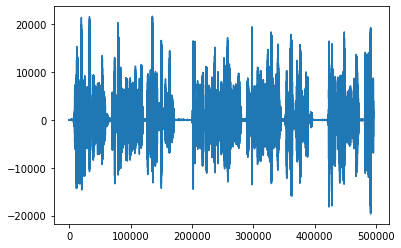

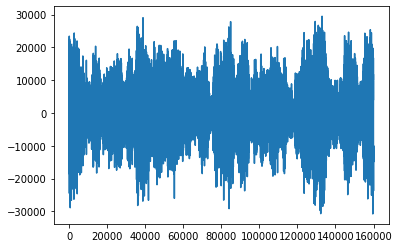

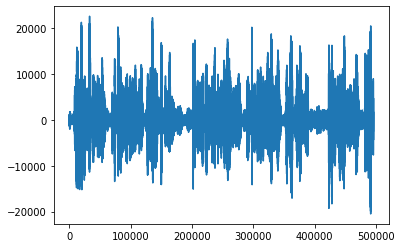

In [5]:
p.figure(1)
p.plot(wav1)
p.figure(2)
p.plot(wav2)
p.figure(3)
p.plot(mixed)


In [30]:
import tensorflow as tf
sess = tf.compat.v1.InteractiveSession()
window_len = 480
window_stride = 240
fft_len = 512

wav_ = tf.placeholder(dtype=tf.float32, shape=[None, None])
stft_ = tf.contrib.signal.stft(wav_,
                              frame_length = window_len,
                              frame_step = window_stride,
                              fft_length = fft_len)
stft_Am_ = tf.abs(stft_)
stft1, stft_am1 = sess.run([stft_, stft_Am_],
                               feed_dict={wav_: wav1.reshape([1, -1])})
stft2, stft_am2 = sess.run([stft_, stft_Am_],
                               feed_dict={wav_: wav2.reshape([1, -1])})

In [31]:
stft_am1.shape

(1, 665, 257)

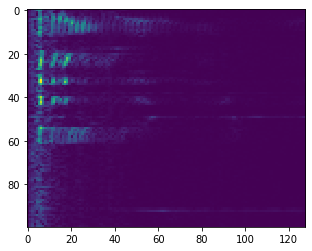

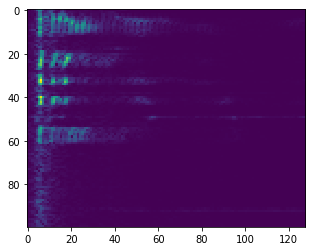

In [32]:
p.figure(1)
p.imshow(stft_am1.reshape([665, 257])[100:200, :128])
p.figure(2)
p.imshow(stft_am2.reshape([665, 257])[100:200, :128])